In [12]:
import random
import copy
import logging
import sys
import os
import sys
import importlib
import numpy as np
from collections import defaultdict
import compress_pickle
import seaborn as sns


sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import my_plot
from my_plot import MyPlotData, my_box_plot
import plot_utility

script_n = 'plot_210619_1ba_local_by_noise_210909'

data_script = 'batch_210617_stability_vs_redundancy_1ba'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'

n_mfs = 488
n_grcs = 1459
pattern_type = 'binary'
# db = {}
db = defaultdict(lambda: {})
direction = '01'

for noise in [1.0]:

    model = 'observed'
    db[model][noise] = compress_pickle.load(
        db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_400.gz')

    for redundancy in [2.0, 3.0, 4.0, 8.0, 12.0, 16.0]:
        for n_share in [2]:
            model = f'local_random_{redundancy}_{n_share}'
            db[model][noise] = compress_pickle.load(
                db_path+f'{data_script}_local_random_redundant_{redundancy}_nshare_{n_share}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_400.gz')

    model = 'local_random'
    db[model][noise] = compress_pickle.load(
        db_path+f'{data_script}_local_random_redundant_{redundancy}_nshare_{n_share}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_400.gz')

            

In [3]:

name_map = {
        'scaleup4': "Observed",
        'observed': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
        'local_random': "Shuffle",
}

palette = {
    name_map['observed']: sns.color_palette()[0],
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['local_random']: sns.color_palette()[2],
    name_map['local_random']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}


Height: 7.518796992481203, Aspect: 1.33


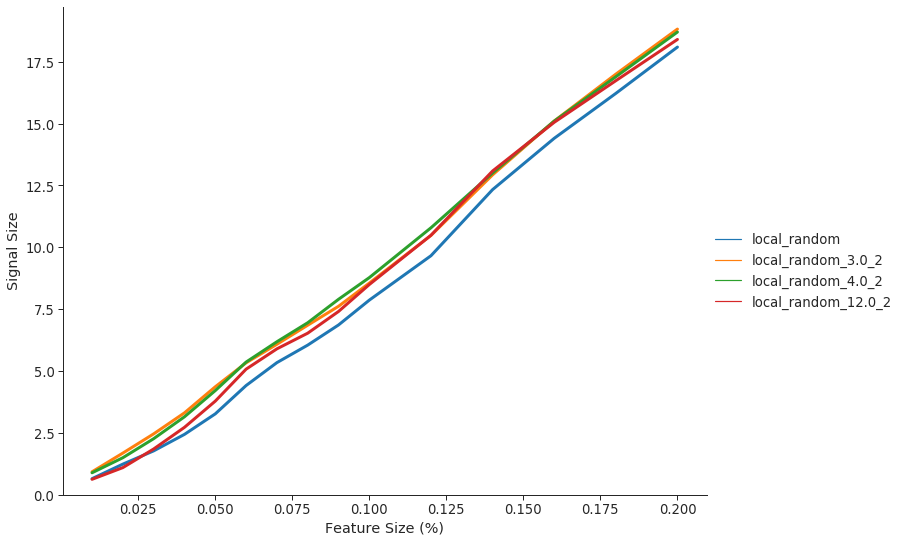

In [45]:
models = [
#         'observed',
        'local_random',
# #         'local_random_2.0_2',
#         'local_random_16.0_2',
#         'local_random_16.0_3',
#         'local_random_16.0_4',
#         'local_random_2.0_2',
        'local_random_3.0_2',
        'local_random_4.0_2',
#         'local_random_8.0_2',
        'local_random_12.0_2',
#         'local_random_16.0_2',
#         'local_random_4.0_2',
#         'local_random_4.0_3',
#         'local_random_4.0_4',
        ]

noise = 1
feature_sizes = [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1]
feature_sizes.extend([.12, .14, .16, .18, .20])
feature = 'avg_delta_minus_random'
# feature = 'avg_delta'
importlib.reload(plot_utility); importlib.reload(my_plot); my_plot.my_relplot(
    plot_utility.build_mpd_by_noise(noise, models, db, feature_sizes=feature_sizes),
    x='feature_size',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
    ylim=[0, None],
#     xlim=[0, 150],
    ci=None,
    y_axis_label='Signal Size',
    x_axis_label='Feature Size (%)',
#     title=f'noise = {noise}',
    save_filename=f'{script_n}_{feature}_noise_{noise}.svg',
    show=True,
    )


Height: 3.7593984962406015, Aspect: 1.33


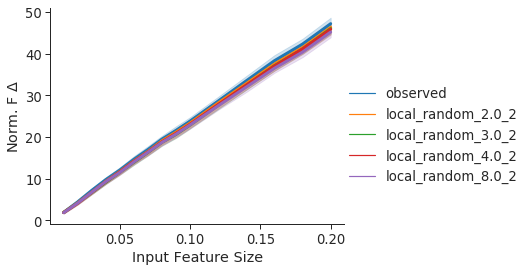

In [18]:
importlib.reload(plot_utility); importlib.reload(my_plot)
models = [
        'observed',
#         'local_random',
# #         'local_random_2.0_2',
#         'local_random_16.0_2',
#         'local_random_16.0_3',
#         'local_random_16.0_4',
        'local_random_2.0_2',
        'local_random_3.0_2',
        'local_random_4.0_2',
        'local_random_8.0_2',
#         'local_random_12.0_2',
#         'local_random_16.0_2',
#         'local_random_4.0_2',
#         'local_random_4.0_3',
#         'local_random_4.0_4',
        ]

name_map = {
    'observed': 'Reconstructed',
    'local_random': 'Uniform Redundancy',
    'local_random_3.0_2': 'Clustered Redundancy',
}

noise = 1
feature_sizes = [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1]
feature_sizes.extend([.12, .14, .16, .18, .20])
# feature = 'avg_delta_minus_random_norm'
feature = 'avg_delta'

# compare_averages = plot_utility.get_average_value_by_feature_size(
#                         db, 'local_random', feature, noise)
# print(compare_averages); asdf
my_plot.my_relplot(
    plot_utility.build_mpd_by_noise(noise, models, db, feature_sizes=feature_sizes,
#                                    compare_averages=compare_averages,
#                                     name_map=name_map,
                                   ),
    x='feature_size',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=5,
#     ylim=[0, None],
#     xlim=[0, 150],
#     ci=None,
    y_axis_label='Norm. F $\Delta$',
    x_axis_label='Input Feature Size',
#     title=f'noise = {noise}',
#     save_filename=f'{script_n}_{feature}_noise_{noise}_1806.svg',
    show=True,
    )


Height: 3.7593984962406015, Aspect: 1.33


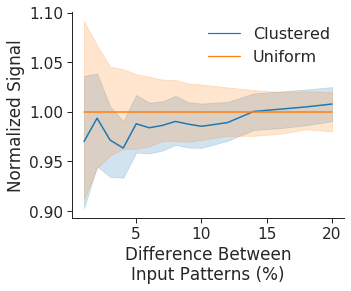

In [5]:
importlib.reload(plot_utility); importlib.reload(my_plot)
models = [
#         'observed',
        'local_random_3.0_2',
        'local_random',
# #         'local_random_2.0_2',
#         'local_random_16.0_2',
#         'local_random_16.0_3',
#         'local_random_16.0_4',
#         'local_random_2.0_2',
#         'local_random_4.0_2',
#         'local_random_8.0_2',
#         'local_random_12.0_2',
#         'local_random_16.0_2',
#         'local_random_4.0_2',
#         'local_random_4.0_3',
#         'local_random_4.0_4',
        ]

name_map = {
    'local_random_3.0_2': 'Clustered',
    'local_random': 'Uniform',
}

noise = 1
feature_sizes = [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1]
feature_sizes.extend([.12, .14, .16, .18, .20])
feature = 'avg_delta_minus_random_norm'
# feature = 'avg_delta'


def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, fontsize=16)


compare_averages = plot_utility.get_average_value_by_feature_size(
                        db, 'local_random', 'avg_delta_minus_random', noise)
# print(compare_averages); asdf
my_plot.my_relplot(
    plot_utility.build_mpd_by_noise(noise, models, db, feature_sizes=feature_sizes,
                                   compare_averages=compare_averages, name_map=name_map),
    x='feature_size_pct',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1.5,
    width=5,
    font_scale=1.75,
#     ylim=[0, None],
#     xlim=[0, 150],
    ci=68,
    y_axis_label='Normalized Signal',
    x_axis_label='Difference Between\nInput Patterns (%)',
#     title=f'noise = {noise}',
    save_filename=f'{script_n}_ci68.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


Height: 3, Aspect: 1.3333333333333333


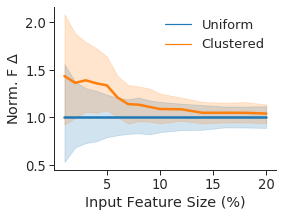

In [13]:
importlib.reload(plot_utility); importlib.reload(my_plot)
models = [
        'local_random',
        'local_random_3.0_2',
        ]

name_map = {
    'local_random': 'Uniform',
    'local_random_3.0_2': 'Clustered',
}

noise = 1
feature_sizes = [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1]
feature_sizes.extend([.12, .14, .16, .18, .20])
feature = 'avg_delta_minus_random_norm'

compare_averages = plot_utility.get_average_value_by_feature_size(
                        db, 'local_random', 'avg_delta_minus_random', noise)

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='top right', frameon=False, fontsize=13)

my_plot.my_relplot(
    plot_utility.build_mpd_by_noise(noise, models, db, feature_sizes=feature_sizes,
                                   compare_averages=compare_averages, name_map=name_map),
    x='feature_size_pct',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=2.5,
    height=3,
    width=4,
#     ylim=[0, None],
#     xlim=[0, 150],
#     ci=None,
    y_axis_label='Norm. F $\Delta$',
    x_axis_label='Input Feature Size (%)',
#     title=f'noise = {noise}',
    save_filename=f'{script_n}_fig.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


Height: 7.518796992481203, Aspect: 1.33


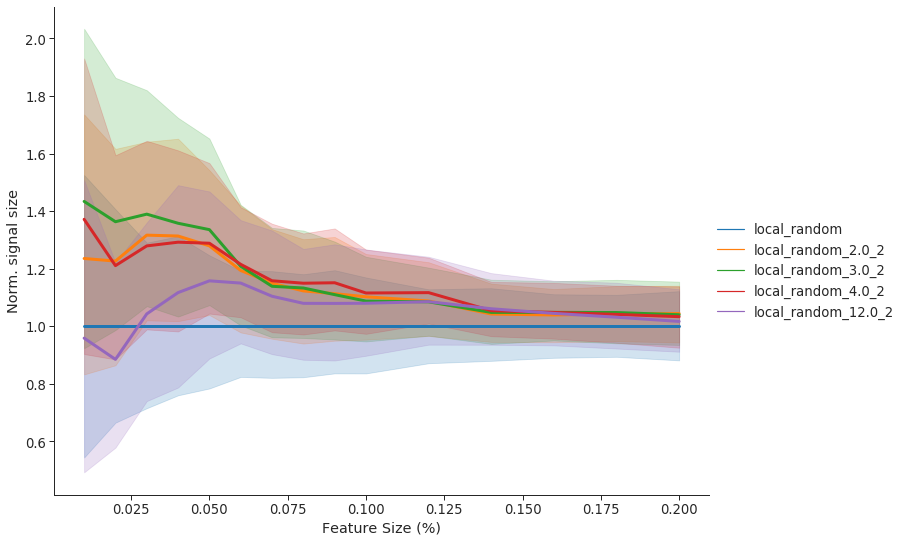

In [51]:
importlib.reload(plot_utility); importlib.reload(my_plot)
models = [
#         'observed',
        'local_random',
# #         'local_random_2.0_2',
#         'local_random_16.0_2',
#         'local_random_16.0_3',
#         'local_random_16.0_4',
        'local_random_2.0_2',
        'local_random_3.0_2',
        'local_random_4.0_2',
#         'local_random_8.0_2',
        'local_random_12.0_2',
#         'local_random_16.0_2',
#         'local_random_4.0_2',
#         'local_random_4.0_3',
#         'local_random_4.0_4',
        ]

noise = 1
feature_sizes = [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1]
feature_sizes.extend([.12, .14, .16, .18, .20])
feature = 'avg_delta_minus_random_norm'
# feature = 'avg_delta'

compare_averages = plot_utility.get_average_value_by_feature_size(
                        db, 'local_random', 'avg_delta_minus_random', noise)
# print(compare_averages); asdf
my_plot.my_relplot(
    plot_utility.build_mpd_by_noise(noise, models, db, feature_sizes=feature_sizes,
                                   compare_averages=compare_averages),
    x='feature_size',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
#     ylim=[0, None],
#     xlim=[0, 150],
#     ci=None,
    y_axis_label='Norm. signal size',
    x_axis_label='Feature Size (%)',
#     title=f'noise = {noise}',
    save_filename=f'{script_n}_{feature}_noise_{noise}_1803.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


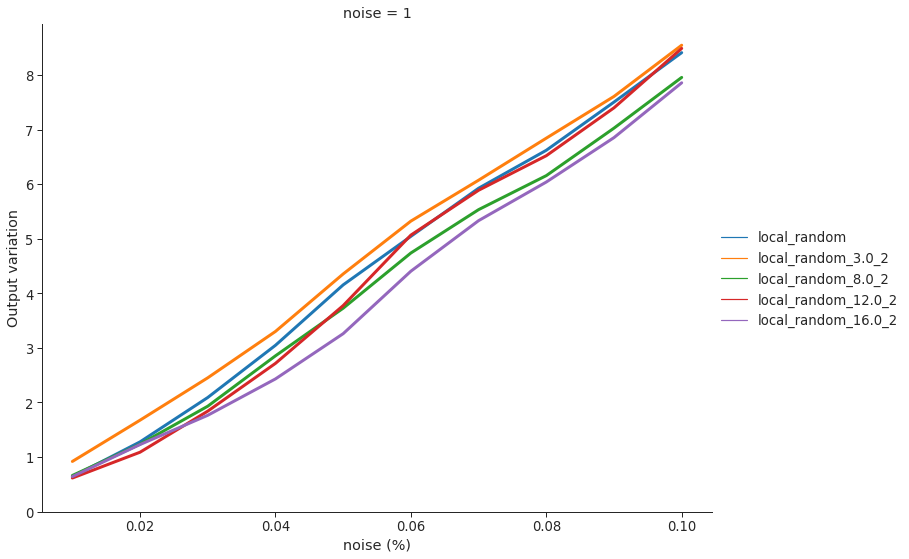

In [21]:
models = [
#         'shuffle',
        'local_random',
# #         'local_random_2.0_2',
#         'local_random_16.0_2',
#         'local_random_16.0_3',
#         'local_random_16.0_4',
#         'local_random_2.0_2',
        'local_random_3.0_2',
#         'local_random_4.0_2',
        'local_random_8.0_2',
        'local_random_12.0_2',
        'local_random_16.0_2',
#         'local_random_4.0_2',
#         'local_random_4.0_3',
#         'local_random_4.0_4',
        ]

noise = 1
feature_sizes = [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1]
# feature_sizes = [.12, .14, .16, .18, .20]
feature = 'avg_delta_minus_random'
# feature = 'avg_delta'
importlib.reload(plot_utility); importlib.reload(my_plot); my_plot.my_relplot(
    plot_utility.build_mpd_by_noise(noise, models, db, feature_sizes=feature_sizes),
    x='feature_size',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
    ylim=[0, None],
#     xlim=[0, 150],
    ci=None,
    y_axis_label='Output variation',
    x_axis_label='noise (%)',
    title=f'noise = {noise}',
    save_filename=f'{script_n}_{feature}_noise_{noise}.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


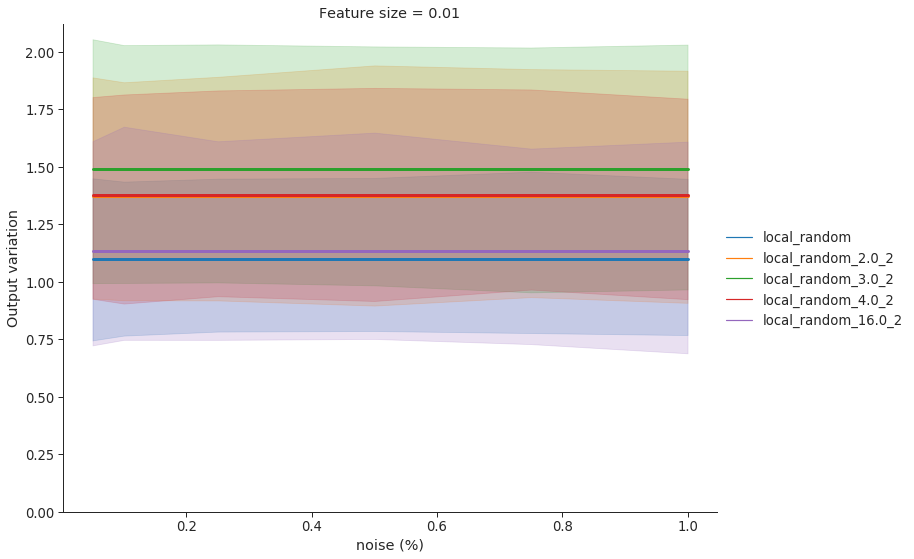

In [57]:
models = [
#         'shuffle',
        'local_random',
# #         'local_random_2.0_2',
#         'local_random_16.0_2',
#         'local_random_16.0_3',
#         'local_random_16.0_4',
        'local_random_2.0_2',
        'local_random_3.0_2',
        'local_random_4.0_2',
#         'local_random_8.0_2',
        'local_random_16.0_2',
#         'local_random_4.0_2',
#         'local_random_4.0_3',
#         'local_random_4.0_4',
        ]

feature_size = 0.01
feature = 'avg_random_delta'
importlib.reload(plot_utility); importlib.reload(my_plot); my_plot.my_relplot(
    plot_utility.build_mpd(feature_size, models, db),
    x='noise',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
    ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Output variation',
    x_axis_label='noise (%)',
    title=f'Feature size = {feature_size}',
    save_filename=f'{script_n}_{feature}_feature_{feature_size}.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


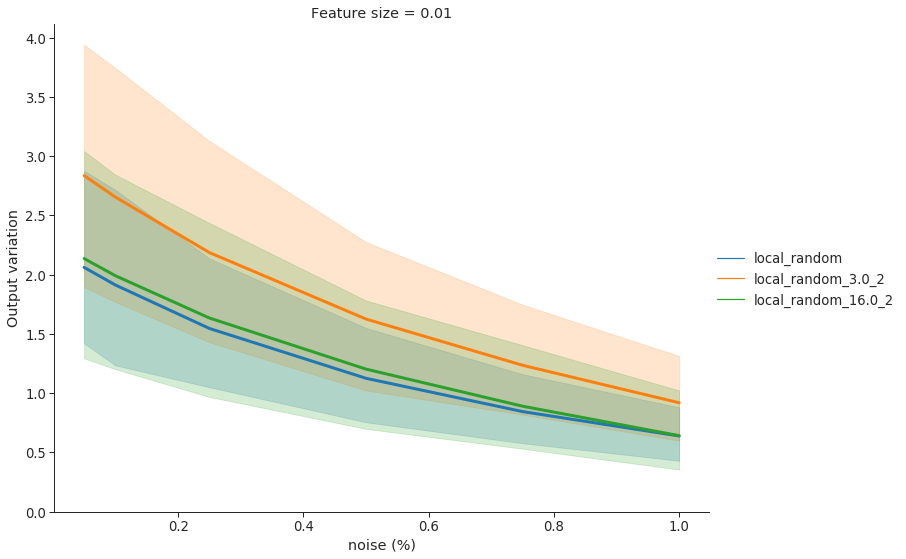

In [22]:
models = [
#         'shuffle',
        'local_random',
# #         'local_random_2.0_2',
#         'local_random_16.0_2',
#         'local_random_16.0_3',
#         'local_random_16.0_4',
#         'local_random_2.0_2',
        'local_random_3.0_2',
#         'local_random_4.0_2',
#         'local_random_8.0_2',
#         'local_random_12.0_2',
        'local_random_16.0_2',
#         'local_random_4.0_2',
#         'local_random_4.0_3',
#         'local_random_4.0_4',
        ]

feature_size = 0.01
feature = 'avg_delta_minus_random'
importlib.reload(plot_utility); importlib.reload(my_plot); my_plot.my_relplot(
    plot_utility.build_mpd(feature_size, models, db),
    x='noise',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
    ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Output variation',
    x_axis_label='noise (%)',
    title=f'Feature size = {feature_size}',
    save_filename=f'{script_n}_{feature}_feature_{feature_size}_1731.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


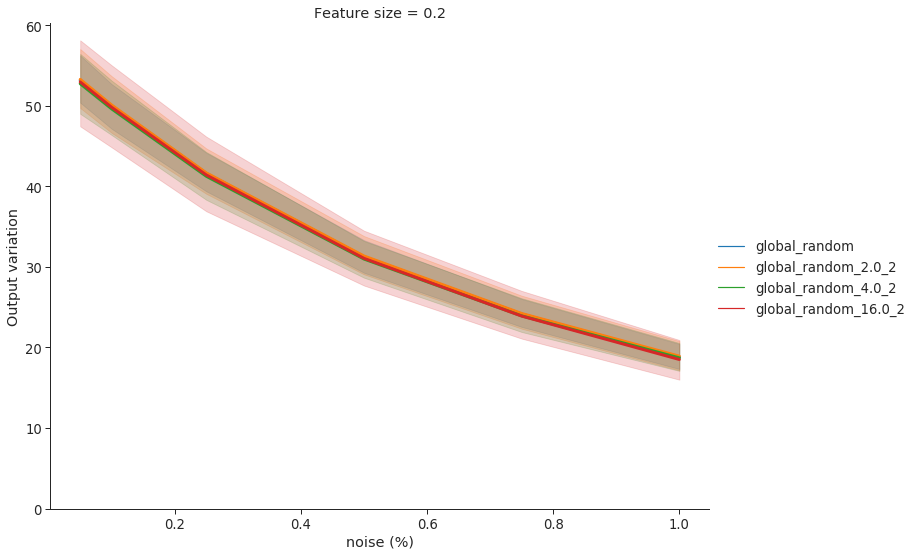

In [53]:
models = [
#         'shuffle',
        'global_random',
# #         'global_random_2.0_2',
#         'global_random_16.0_2',
#         'global_random_16.0_3',
#         'global_random_16.0_4',
        'global_random_2.0_2',
#         'global_random_3.0_2',
        'global_random_4.0_2',
#         'global_random_8.0_2',
        'global_random_16.0_2',
#         'global_random_4.0_2',
#         'global_random_4.0_3',
#         'global_random_4.0_4',
        ]
feature_size = 0.2
feature = 'avg_delta_minus_random'
importlib.reload(plot_utility); importlib.reload(my_plot); my_plot.my_relplot(
    plot_utility.build_mpd(feature_size, models, db),
    x='noise',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
    ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Output variation',
    x_axis_label='noise (%)',
    title=f'Feature size = {feature_size}',
    save_filename=f'{script_n}_{feature}_feature_{feature_size}_2047.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


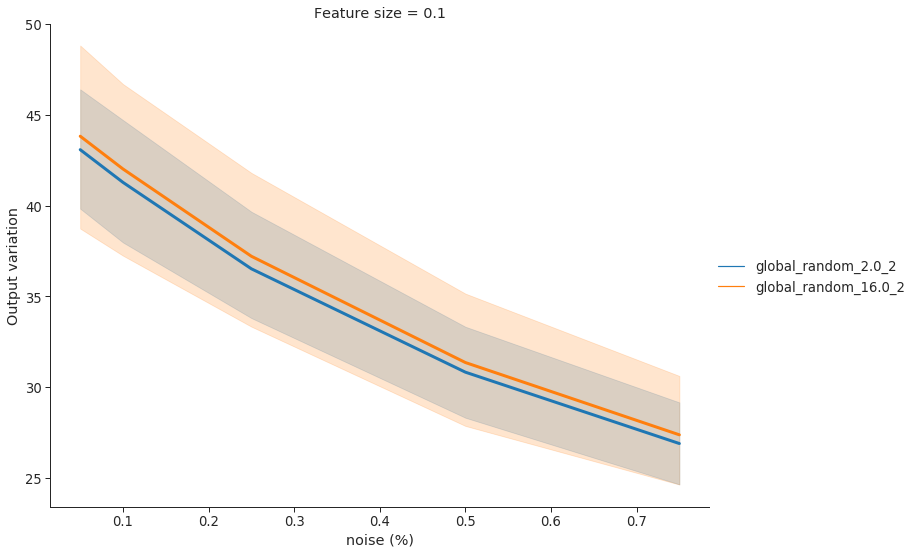

In [85]:
models = [
#         'shuffle',
#         'global_random',
# #         'global_random_2.0_2',
# #         'global_random_16.0_2',
# #         'global_random_16.0_3',
# #         'global_random_16.0_4',
        'global_random_2.0_2',
#         'global_random_4.0_2',
#         'global_random_8.0_2',
        'global_random_16.0_2',
#         'global_random_4.0_2',
#         'global_random_4.0_3',
#         'global_random_4.0_4',
        ]
feature_size = 0.1
feature = 'avg_delta'
importlib.reload(my_plot); my_plot.my_relplot(
    build_mpd(feature_size, models),
    x='noise',
    y='avg_delta',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
#     ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Output variation',
    x_axis_label='noise (%)',
    title=f'Feature size = {feature_size}',
    save_filename=f'{script_n}_{feature}_feature_{feature_size}_16.svg',
    show=True,
    )
